## Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Read in Data

In [10]:
df = pd.read_csv('data-disasters.csv')
df.set_index(['year', 'state'], inplace=True)
df.head()

drought  flooding  freeze  severe storm  tropical cyclone  \
year state                                                              
1980 AK           0         0       0             0                 0   
     AL           1         0       0             0                 0   
     AR           1         1       0             0                 0   
     AZ           0         0       0             0                 0   
     CA           0         0       0             0                 0   

            wildfire  winter storm  
year state                          
1980 AK            0             0  
     AL            0             0  
     AR            0             0  
     AZ            0             0  
     CA            0             0

In [14]:
cols = list(df.columns)
df['total'] = 0
for col in cols:
    df['total'] += df[col]
    
df.head()

drought  flooding  freeze  severe storm  tropical cyclone  \
year state                                                              
1980 AK           0         0       0             0                 0   
     AL           1         0       0             0                 0   
     AR           1         1       0             0                 0   
     AZ           0         0       0             0                 0   
     CA           0         0       0             0                 0   

            wildfire  winter storm  total  
year state                                 
1980 AK            0             0      0  
     AL            0             0      1  
     AR            0             0      2  
     AZ            0             0      0  
     CA            0             0      0

## Plots
### Top 10 states

In [17]:
total = df.groupby('state')['total'].sum()
top10states = total.sort_values(ascending=False).head(10)
top10states

state
TX    95
OK    70
IL    70
AL    69
NC    68
GA    68
MS    66
TN    66
MO    64
VA    60
Name: total, dtype: int64

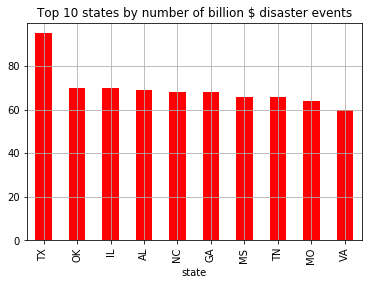

In [26]:
top10states.plot(kind='bar',
                 color='red',
                 grid=True,
                 title='Top 10 states by number of billion $ disaster events');

### Distribution over years

Text(0.5, 1.0, 'Number of billion $ disaster events over years')

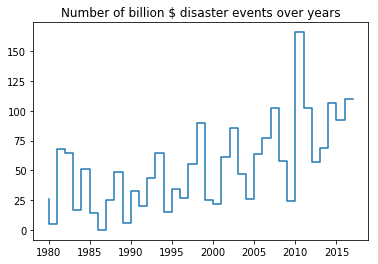

In [29]:
total = df.groupby('year')['total'].sum()
plt.plot(total,
         linestyle="steps")
plt.title('Number of billion $ disaster events over years')

### Least affected states

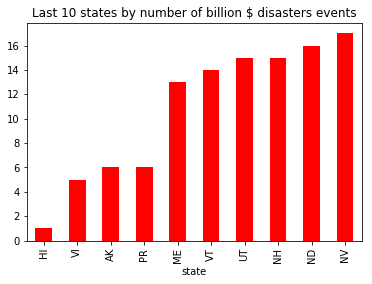

In [36]:
total = df.groupby('state')['total'].sum()
last10states = total.sort_values(ascending=True).head(10)
last10states.plot(kind='bar', color='red', title='Last 10 states by number of billion $ disasters events')

### Stacked bar plot

In [69]:
total_by_state = df.groupby('state').sum()
least = total_by_state.sort_values('total', ascending=True).head(10)
least

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,total
state,,,,,,,,
HI,0,0,0,0,1,0,0,1
VI,0,0,0,0,5,0,0,5
AK,0,0,0,0,0,6,0,6
PR,0,0,0,0,6,0,0,6
ME,1,0,0,2,2,0,8,13
VT,1,0,0,3,3,0,7,14
UT,6,1,1,0,0,7,0,15
NH,1,0,0,3,4,0,7,15
ND,10,3,1,0,0,1,1,16


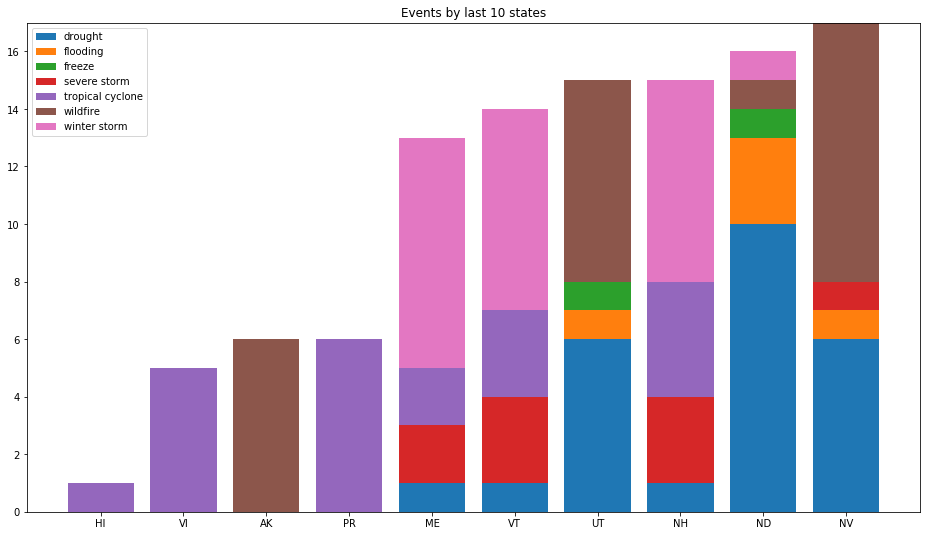

In [81]:
fig, ax = plt.subplots(1, figsize=(16, 9))
bar_x = [i + 1 for i in range(len(least['drought']))]
ax.bar(bar_x, least['drought'], label='drought')
ax.bar(bar_x, least['flooding'], bottom=least['drought'], label='flooding')
ax.bar(bar_x,
       least['freeze'],
       bottom=[i+j for i,j in zip(least['drought'], least['flooding'])],
       label='freeze')
ax.bar(bar_x,
       least['severe storm'],
       bottom=[i+j+k for i, j, k in zip(least['drought'], least['flooding'], least['freeze'])],
       label='severe storm')
ax.bar(bar_x,
       least['tropical cyclone'],
       bottom=[i+j+k+l for i, j, k, l in zip(least['drought'], least['flooding'], least['freeze'], least['severe storm'])],
       label='tropical cyclone')
ax.bar(bar_x,
       least['wildfire'],
       bottom=[i+j+k+l+m for i, j, k, l, m in zip(
           least['drought'],
           least['flooding'],
           least['freeze'],
           least['severe storm'],
           least['tropical cyclone'])],
       label='wildfire')
ax.bar(bar_x,
       least['winter storm'],
       bottom=[i+j+k+l+m+n for i, j, k, l, m, n in zip(
           least['drought'],
           least['flooding'],
           least['freeze'],
           least['severe storm'],
           least['tropical cyclone'],
           least['wildfire'])],
       label='winter storm')
ax.set_title('Events by last 10 states')
ax.set_xticks(bar_x)
ax.set_xticklabels(least.index)
plt.legend();